<a href="https://colab.research.google.com/github/eventia/mnistcode/blob/master/aicode07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 고등학교 수학과 파이썬으로 배우는 인공지능 소스코드  **Ch 7**

In [0]:
# upload 'sample_imgbw512x512.png'

from google.colab import files
upload = files.upload()



Saving sample_imgbw512x512.png to sample_imgbw512x512.png


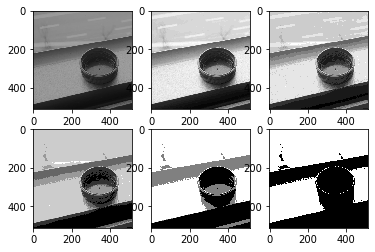

In [0]:
# 7.3. 샘플림과 양자화 1 - 양자화

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pmg
import cv2
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

imgfile = 'sample_imgbw512x512.png'
# imgfile = 'IMG_3.png'

image = cv2.imread(imgfile, cv2. IMREAD_UNCHANGED)
image2 = cv2.imread(imgfile, cv2. IMREAD_GRAYSCALE)
image3 = cv2.imread(imgfile, cv2. IMREAD_GRAYSCALE)
image4 = cv2.imread(imgfile, cv2. IMREAD_GRAYSCALE)
image5 = cv2.imread(imgfile, cv2. IMREAD_GRAYSCALE)
image6 = cv2.imread(imgfile, cv2. IMREAD_GRAYSCALE)
image7 = cv2.imread(imgfile, cv2. IMREAD_GRAYSCALE)

for i in range (0, 512):
    for j in range (0, 512):
        image2[i,j] = (image2[i,j] // 4)*4
        image3[i,j] = (image3[i,j] // 8)*8
        image4[i,j] = (image4[i,j] // 16)*16
        image5[i,j] = (image5[i,j] // 32)*32
        image6[i,j] = (image6[i,j] // 64)*64
        image7[i,j] = (image7[i,j] // 128)*128


fig, axes = plt.subplots(nrows=2, ncols=3)

ax = axes.ravel()
ax[0].imshow(image, cmap='gray')
# ax[0].set_title("Original image 8bits, 256 steps")

ax[1].imshow(image2, cmap='gray')
# ax[1].set_title("Quantized image 6bit, 64 steps")

ax[2].imshow(image4, cmap='gray')
# ax[2].set_title("Quantized image 4bit, 16 steps")

ax[3].imshow(image5, cmap='gray')
# ax[3].set_title("Quantized image 3bit, 8 steps")

ax[4].imshow(image6, cmap='gray')
# ax[4].set_title("Quantized image 2bit, 4 steps")

ax[5].imshow(image7, cmap='gray')
# ax[5].set_title("Quantized image 1bit, 2 steps")

plt.show()


<Figure size 2160x1800 with 0 Axes>

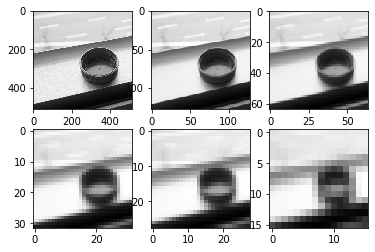

In [0]:
# 7.3. 샘플림과 양자화 2 - 샘플링

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pmg
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

imgfile = 'sample_imgbw512x512.png'
# imgfile = 'IMG_3.png'
img = pmg.imread(imgfile)

# image = color.rgb2gray(data.astronaut())
image = color.rgb2gray(img)


image = resize(image, (image.shape[0] // 1, image.shape[1] // 1), anti_aliasing=True)
image2 = resize(image, (image.shape[0] // 4, image.shape[1] // 4), anti_aliasing=True)
image3 = resize(image, (image.shape[0] // 8, image.shape[1] // 8), anti_aliasing=True)
image4 = resize(image, (image.shape[0] // 16, image.shape[1] // 16), anti_aliasing=True)
image5 = resize(image, (image.shape[0] // 18, image.shape[1] // 18), anti_aliasing=True)
image6 = resize(image, (image.shape[0] // 32, image.shape[1] // 32), anti_aliasing=True)

fig, axes = plt.subplots(nrows=2, ncols=3)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
# ax[0].set_title("Original image 512x512")

ax[1].imshow(image2, cmap='gray')
# ax[1].set_title("Sampled image 128x128 (1/4)")

ax[2].imshow(image3, cmap='gray')
# ax[2].set_title("Sampled image 64x64 (1/8)")

ax[3].imshow(image4, cmap='gray')
# ax[3].set_title("Sampled image 32x32 (1/16)")

ax[4].imshow(image5, cmap='gray')
# ax[4].set_title("Sampled image 28x28 (1/18)")

ax[5].imshow(image6, cmap='gray')
# ax[5].set_title("Sampled image 16x16 (1/32)")

#ax[0].set_xlim(0, 512)
#ax[0].set_ylim(512, 0)
#plt.tight_layout()
plt.show()


Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step


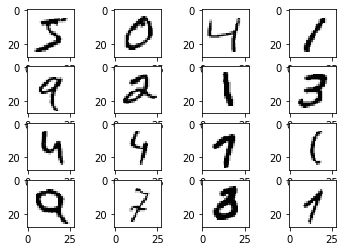

In [0]:
# 7.4. MNIST 특징

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pmg
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

fig, axes = plt.subplots(nrows=4, ncols=4)
ax = axes.ravel()

for i in range(8):
    image = x_train[i]
    ax[i].imshow(image, cmap='Greys')

image = x_train[6210]
ax[8+0].imshow(image, cmap='Greys')
image = x_train[6218]
ax[8+1].imshow(image, cmap='Greys')
image = x_train[6221]
ax[8+2].imshow(image, cmap='Greys')
image = x_train[6226]
ax[8+3].imshow(image, cmap='Greys')
image = x_train[6238]
ax[8+4].imshow(image, cmap='Greys')
image = x_train[6250]
ax[8+5].imshow(image, cmap='Greys')
image = x_train[6251]
ax[8+6].imshow(image, cmap='Greys')
image = x_train[6254]
ax[8+7].imshow(image, cmap='Greys')


plt.show()


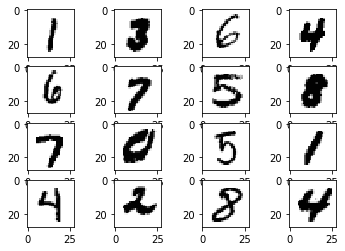

In [0]:
# 7.5	MNIST 에서 사진 가져오기 1

# 그림 출력을 위해 pyplot 을 사용합니다.
import matplotlib.pyplot as plt

# keras 에 저장되어 있는 mnist datasets 을 불러옵니다.
from keras.datasets import mnist

# load_data() 를  사용해서 train 과 test 자료를 가져옵니다.
# x_train : 훈련자료 이미지 (60,000)
# y_train : 훈련자료 라벨 (60,000)
# x_test : 검증자료 이미지 (10,000)
# y_test : 검증자료 라벨 (10,000)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 그림을 가져올 때 가로(ncols)로 4개, 세로(nrows)로 4개, 
# 총 16개를 보여주기 위한 설정값
fig, axes = plt.subplots(nrows=4, ncols=4)
ax = axes.ravel()

# 16개의 훈련자료 이미지를 화면에 출력
for i in range(16):
    image = x_train[1200+i]
    ax[i].imshow(image, cmap='Greys')

plt.show()


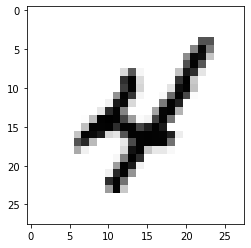

In [0]:
# 7.5	MNIST 에서 사진 가져오기 2

import matplotlib.pyplot as plt
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

image = x_train[9]
plt.imshow(image, cmap='Greys')
plt.show()
